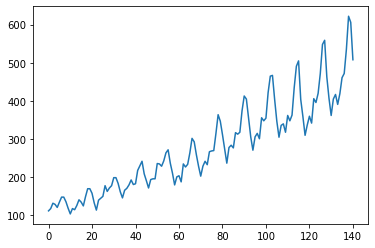

In [13]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [14]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# fix random seed for reproducibility
numpy.random.seed(7)

In [15]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [16]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [17]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

94 47


In [18]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [20]:
print (trainX[:10,:])
print (trainY[:10])

[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]]
[0.02702703 0.05405405 0.04826255 0.03281853 0.05984557 0.08494207
 0.08494207 0.06177607 0.02895753 0.        ]


In [21]:
print(trainX[-10:,:])
print(trainY[-10:])

[[0.25675675]
 [0.3359073 ]
 [0.34749034]
 [0.33397684]
 [0.41119692]
 [0.4034749 ]
 [0.4131274 ]
 [0.52123547]
 [0.5965251 ]
 [0.58108103]]
[0.3359073  0.34749034 0.33397684 0.41119692 0.4034749  0.4131274
 0.52123547 0.5965251  0.58108103 0.484556  ]


In [22]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [23]:
print(trainX[:10,:])

[[[0.01544401]]

 [[0.02702703]]

 [[0.05405405]]

 [[0.04826255]]

 [[0.03281853]]

 [[0.05984557]]

 [[0.08494207]]

 [[0.08494207]]

 [[0.06177607]]

 [[0.02895753]]]


In [24]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 0s - loss: 0.0452
Epoch 2/100
92/92 - 0s - loss: 0.0221
Epoch 3/100
92/92 - 0s - loss: 0.0171
Epoch 4/100
92/92 - 0s - loss: 0.0158
Epoch 5/100
92/92 - 0s - loss: 0.0149
Epoch 6/100
92/92 - 0s - loss: 0.0138
Epoch 7/100
92/92 - 0s - loss: 0.0127
Epoch 8/100
92/92 - 0s - loss: 0.0117
Epoch 9/100
92/92 - 0s - loss: 0.0107
Epoch 10/100
92/92 - 0s - loss: 0.0097
Epoch 11/100
92/92 - 1s - loss: 0.0086
Epoch 12/100
92/92 - 1s - loss: 0.0077
Epoch 13/100
92/92 - 1s - loss: 0.0067
Epoch 14/100
92/92 - 1s - loss: 0.0058
Epoch 15/100
92/92 - 0s - loss: 0.0050
Epoch 16/100
92/92 - 1s - loss: 0.0043
Epoch 17/100
92/92 - 0s - loss: 0.0036
Epoch 18/100
92/92 - 1s - loss: 0.0032
Epoch 19/100
92/92 - 1s - loss: 0.0028
Epoch 20/100
92/92 - 1s - loss: 0.0025
Epoch 21/100
92/92 - 1s - loss: 0.0023
Epoch 22/100
92/92 - 1s - loss: 0.0021
Epoch 23/100
92/92 - 1s - loss: 0.0021
Epoch 24/100
92/92 - 1s - loss: 0.0020
Epoch 25/100
92/92 - 0s - loss: 0.0019
Epoch 26/100
92/92 - 1s - loss: 0.

In [25]:
# 予想を遂行する
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# 予測を invert する
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# 平方平均二乗誤差 (RMSE, root mean squared error) を計算する
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.13 RMSE
Test Score: 49.78 RMSE


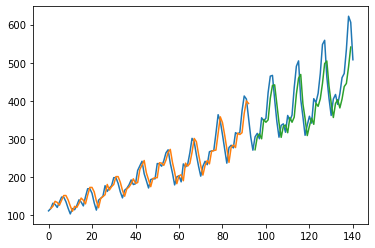

In [27]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()